In [1]:
library('tidyverse')
library('readxl')
library('ggrepel')

library('limma')
library('edgeR')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
readxl::excel_sheets('1102025Chondrosarcoma Nanostring Normalized.xlsx')

[1] "Chondrosarcoma Nanostring Norma" "Raw data"                       
[3] "1102025Chondrosarcoma Nanostrin"

In [3]:
qc_tbl <-
    read_xlsx(
        '1102025Chondrosarcoma Nanostring Normalized.xlsx',
        sheet='1102025Chondrosarcoma Nanostrin'
    ) %>%
    rename(`sample_name_simple`=`Sample Name`)


New names:
• `` -> `...6`


In [4]:
ns_colnames <-
    read_xlsx(
        '1102025Chondrosarcoma Nanostring Normalized.xlsx',
        sheet='Raw data',
        n_max=1
    ) %>%
    colnames()

ns_colnames

[1] "Probe Name"                                      
 [2] "Accession #"                                     
 [3] "Class Name"                                      
 [4] "20250102_30102954030325-01_10P_07.RCC"           
 [5] "20250102_30102954030325-01_12T_11.RCC"           
 [6] "20250102_30102954030325-01_16P_05.RCC"           
 [7] "20250102_30102954030325-01_17P_10.RCC"           
 [8] "20250102_30102954030325-01_18P_04.RCC"           
 [9] "20250102_30102954030325-01_2T_02.RCC"            
[10] "20250102_30102954030325-01_3P_03.RCC"            
[11] "20250102_30102954030325-01_6P_06.RCC"            
[12] "20250102_30102954030325-01_6T_08.RCC"            
[13] "20250102_30102954030325-01_8P_09.RCC"            
[14] "20250102_30102954030325-01_9P_01.RCC"            
[15] "20250102_30102954030325-01_panel standard_12.RCC"
[16] "20250102_30102954060325-01_11P_05.RCC"           
[17] "20250102_30102954060325-01_12P_02.RCC"           
[18] "20250102_30102954060325-01_13P_10.RCC"           
[19] "20250102_30102954060325-01_13T_09.RCC"           
[20] "20250102_30102954060325-01_15T_08.RCC"           
[21] "20250102_30102954060325-01_16T_01.RCC"           
[22] "20250102_30102954060325-01_19P_03.RCC"           
[23] "20250102_30102954060325-01_19T_11.RCC"           
[24] "20250102_30102954060325-01_3T_07.RCC"            
[25] "20250102_30102954060325-01_5T_04.RCC"            
[26] "20250102_30102954060325-01_8T_06.RCC"            
[27] "20250102_30102954060325-01_panel standard_12.RCC"
[28] "20250103_30102954230325-01_15P_04.RCC"           
[29] "20250103_30102954230325-01_17T_02.RCC"           
[30] "20250103_30102954230325-01_1T_03.RCC"            
[31] "20250103_30102954230325-01_4T_05.RCC"            
[32] "20250103_30102954230325-01_5P_01.RCC"            
[33] "20250103_30102954230325-01_panel standard_06.RCC"

In [5]:
cnt_wtbl <-
    read_xlsx(
        '1102025Chondrosarcoma Nanostring Normalized.xlsx',
        sheet='Raw data',
        skip=2,
        col_names=ns_colnames
    ) %>%
    select(
        -`20250102_30102954030325-01_panel standard_12.RCC`,
        -`20250102_30102954060325-01_panel standard_12.RCC`,
        -`20250103_30102954230325-01_panel standard_06.RCC`
    )

cnt_wtbl %>%
    head()

Probe Name,Accession #,Class Name,20250102_30102954030325-01_10P_07.RCC,20250102_30102954030325-01_12T_11.RCC,20250102_30102954030325-01_16P_05.RCC,20250102_30102954030325-01_17P_10.RCC,20250102_30102954030325-01_18P_04.RCC,20250102_30102954030325-01_2T_02.RCC,20250102_30102954030325-01_3P_03.RCC,⋯,20250102_30102954060325-01_19P_03.RCC,20250102_30102954060325-01_19T_11.RCC,20250102_30102954060325-01_3T_07.RCC,20250102_30102954060325-01_5T_04.RCC,20250102_30102954060325-01_8T_06.RCC,20250103_30102954230325-01_15P_04.RCC,20250103_30102954230325-01_17T_02.RCC,20250103_30102954230325-01_1T_03.RCC,20250103_30102954230325-01_4T_05.RCC,20250103_30102954230325-01_5P_01.RCC
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2M,NM_000014.4,Endogenous,4593,27,22,6,16,6406,14024,⋯,344,2785,9979,45,14508,16,10,123,373,43
ACVR1C,NM_145259.2,Endogenous,51,11,18,5,7,19,30,⋯,181,208,12,9,40,8,8,3,20,2
ADAM12,NM_003474.5,Endogenous,172,19,15,7,23,934,590,⋯,267,1382,637,17,849,18,8,30,26,6
ADGRE1,NM_001256252.1,Endogenous,14,15,18,4,11,42,18,⋯,78,166,11,8,23,9,14,12,17,4
ADM,NM_001124.2,Endogenous,406,22,26,6,12,133,313,⋯,107,678,136,12,92,12,8,15,34,10
ADORA2A,NM_000675.5,Endogenous,36,12,10,5,8,105,63,⋯,48,92,35,11,86,12,5,35,20,7


In [6]:
qc_tbl

sample_name_simple,Sample ID,Qubit,Est. TS,Yield (ng),...6,DV300 %,Rec. Input,Volume
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1T,116359,0.0,0.366,10.248,0.366,40.26,125,341.530055
1P,116360,0.0,1.060,29.680,1.060,35.049999999999997,125,117.924528
2T,116361,45.2,NA,1265.600,45.200,8.31,500,11.061947
2P,116362,63.4,NA,1775.200,63.400,24.03,250,3.943218
3T,116363,147.0,NA,4116.000,147.000,20.69,250,1.700680
3P,116364,165.0,NA,4620.000,165.000,15.97,250,1.515152
4T,116365,8.2,NA,229.600,8.200,8.56,500,60.975610
4P,116366,0.0,0.408,11.424,0.408,2.0190000000000001,NA,0.000000
5T,116367,0.0,0.132,3.696,0.132,22.84,250,1893.939394


In [7]:
sample_tbl <-
    tibble(
        `sample_name`=
            cnt_wtbl %>%
            select(-`Probe Name`, -`Accession #`, -`Class Name`) %>%
            colnames()
    ) %>%
    mutate(
        `sample_name_simple`=
            `sample_name` %>%
            str_replace_all('.*-01_', '') %>%
            str_replace_all('_.*', ''),
        `sample_id`=str_replace_all(`sample_name_simple`, '[PT]', ''),
        `sample_type`=str_replace_all(`sample_name_simple`, '[0-9]', ''),
    ) %>%
    add_count(`sample_id`) %>%
    left_join(qc_tbl, by='sample_name_simple')

sample_tbl

sample_name,sample_name_simple,sample_id,sample_type,n,Sample ID,Qubit,Est. TS,Yield (ng),...6,DV300 %,Rec. Input,Volume
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
20250102_30102954030325-01_10P_07.RCC,10P,10,P,1,116378,106.0,NA,2968.000,106.000,5.18,1000,9.433962
20250102_30102954030325-01_12T_11.RCC,12T,12,T,2,116381,0.0,0.290,8.120,0.290,n/a,NA,0.000000
20250102_30102954030325-01_16P_05.RCC,16P,16,P,2,116390,0.0,1.180,33.040,1.180,14.96,500,423.728814
20250102_30102954030325-01_17P_10.RCC,17P,17,P,2,116392,0.0,0.105,2.940,0.105,26.28,175,1666.666667
20250102_30102954030325-01_18P_04.RCC,18P,18,P,1,116394,0.0,0.085,2.380,0.085,31.22,175,2058.823529
20250102_30102954030325-01_2T_02.RCC,2T,2,T,1,116361,45.2,NA,1265.600,45.200,8.31,500,11.061947
20250102_30102954030325-01_3P_03.RCC,3P,3,P,2,116364,165.0,NA,4620.000,165.000,15.97,250,1.515152
20250102_30102954030325-01_6P_06.RCC,6P,6,P,2,116370,158.0,NA,4424.000,158.000,10.18,500,3.164557
20250102_30102954030325-01_6T_08.RCC,6T,6,T,2,116369,96.2,NA,2693.600,96.200,7.51,1000,10.395010


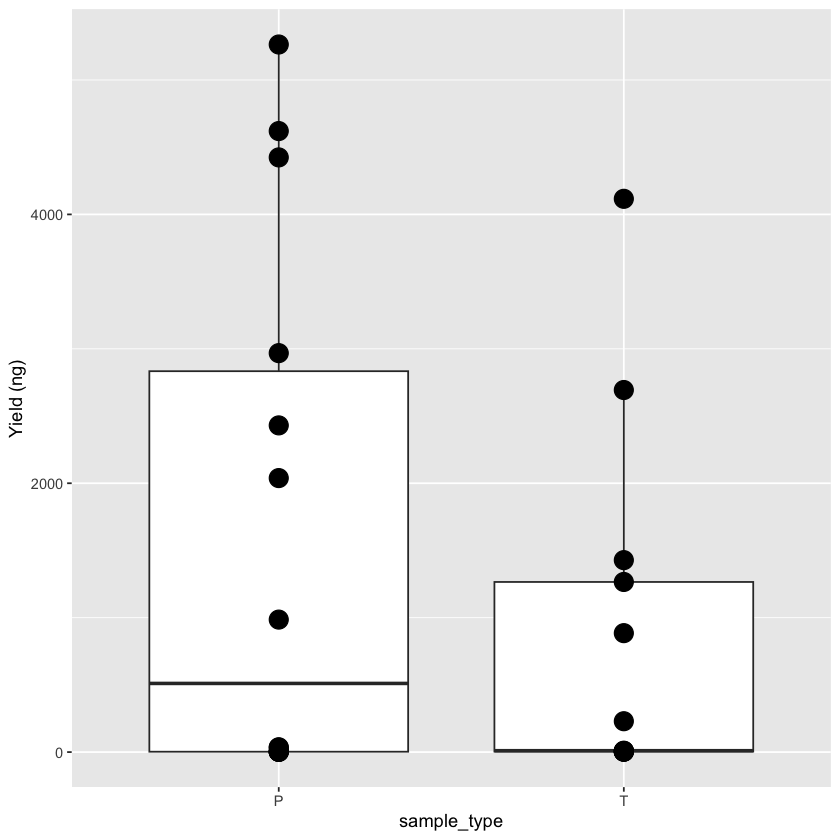

In [8]:
sample_tbl %>%
    ggplot(aes(x=`sample_type`, y=`Yield (ng)`)) +
        geom_boxplot() +
        geom_point(size=5)

In [9]:
sample_tbl_gy <-
    sample_tbl %>%
    filter(`Yield (ng)` > 1000)

In [10]:
cnt_mtx <-
    cnt_wtbl %>%
    (function(x) {
        x_mtx <-
            x %>%
            select(-`Probe Name`, -`Accession #`, -`Class Name`) %>%
            as.matrix()
        
        rownames(x_mtx) <-
            x %>%
            select(`Probe Name`) %>%
            pull()
        
        x_mtx[, sample_tbl_gy$`sample_name`]
    })

cnt_mtx

,20250102_30102954030325-01_10P_07.RCC,20250102_30102954030325-01_2T_02.RCC,20250102_30102954030325-01_3P_03.RCC,20250102_30102954030325-01_6P_06.RCC,20250102_30102954030325-01_6T_08.RCC,20250102_30102954030325-01_8P_09.RCC,20250102_30102954030325-01_9P_01.RCC,20250102_30102954060325-01_11P_05.RCC,20250102_30102954060325-01_19T_11.RCC,20250102_30102954060325-01_3T_07.RCC
A2M,4593,6406,14024,908,3027,9967,12743,2080,2785,9979
ACVR1C,51,19,30,34,27,49,160,52,208,12
ADAM12,172,934,590,735,1152,629,746,666,1382,637
ADGRE1,14,42,18,20,8,40,31,3,166,11
ADM,406,133,313,38,356,104,251,112,678,136
ADORA2A,36,105,63,35,43,74,89,63,92,35
AKT1,1746,2199,2098,1388,2398,1772,3561,2367,2183,1700
ALDOA,17160,9075,17323,7087,10607,9282,22404,10897,12251,7189
ALDOC,453,307,206,564,753,313,1667,71,503,54
ANGPT1,313,211,155,111,284,102,139,42,288,199


In [11]:
exp_model <-
    sample_tbl_gy %>%
    model.matrix(data=., ~`sample_type`)

exp_model

,(Intercept),sample_typeT
1,1,0
2,1,1
3,1,0
4,1,0
5,1,1
6,1,0
7,1,0
8,1,0
9,1,1
10,1,1


In [12]:
dge <-
    DGEList(cnt_mtx) %>%
    calcNormFactors()

keep <- filterByExpr(dge, exp_model)
dge <- dge[keep,, keep.lib.sizes=FALSE]
vdge <- voom(dge, exp_model)
all_fit <- lmFit(vdge, exp_model) %>% eBayes

In [13]:
all_table <-
    topTable(all_fit, adjust.method='fdr', n=nrow(cnt_mtx), sort.by='p') %>%
    rownames_to_column(var='gene_symbol') %>%
    as_tibble()

all_table %>%
    head(50)

Removing intercept from test coefficients



gene_symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CXCL13,3.0607372,8.413130,6.145786,3.375814e-05,0.02609505,-0.2856608
S100A9,2.0204317,7.992748,3.750358,2.390430e-03,0.87515418,-2.1286164
SH2D1A,1.3290400,4.922838,3.567201,3.396459e-03,0.87515418,-2.5487637
CXCL2,1.4196287,7.772755,3.325597,5.411353e-03,0.90171471,-2.5448568
NKG7,1.5950262,7.011162,3.150999,7.583056e-03,0.90171471,-2.7842342
S100A8,1.7228451,7.127136,3.063295,8.983571e-03,0.90171471,-2.8648784
IER3,1.7180276,8.627483,3.019474,9.776967e-03,0.90171471,-2.8524727
MARCO,1.9526033,6.281176,2.953470,1.110511e-02,0.90171471,-3.0105549
LTB,1.2146719,6.208588,2.890815,1.253049e-02,0.90171471,-3.0935715


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_label_repel()`).”


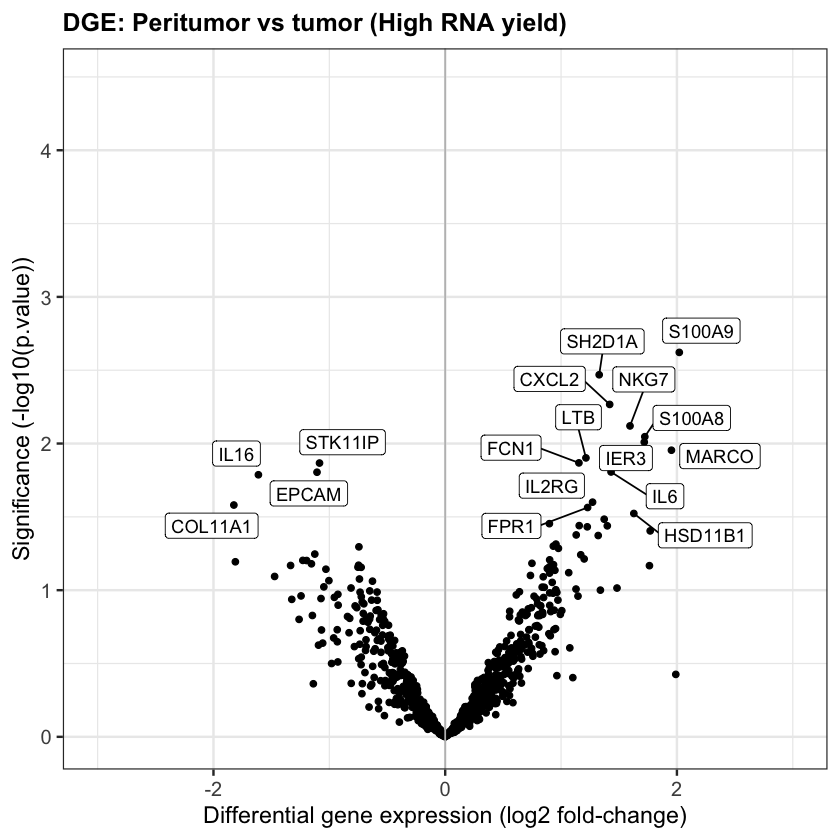

In [14]:
all_table %>%
    mutate(
        `label`=case_when(
            abs(`logFC`) >= 2 ~ str_replace_all(`gene_symbol`, ',.*', ''),
            -log10(`P.Value`) > 1.5 ~ str_replace_all(`gene_symbol`, ',.*', ''),
            TRUE ~ ''
        )
    ) %>%
    ggplot(aes(x=`logFC`, y=-log10(`P.Value`))) +
        geom_point() +
        geom_vline(xintercept=0, color='gray') +
        geom_label_repel(aes(label=`label`), max.overlaps=Inf, force=10) +
        labs(
            x='Differential gene expression (log2 fold-change)',
            y='Significance (-log10(p.value))',
            title='DGE: Peritumor vs tumor (High RNA yield)'
        ) +
        xlim(-3, 3) +
        theme_bw(base_size=15) +
        theme(
            axis.text=element_text(size=12),
            axis.title=element_text(size=14),
            strip.text.x = element_text(size=15, face="bold"),
            plot.title = element_text(size=15, face="bold")
        )

In [15]:
genes_of_interest <-
    c('CD3', 'CD4', 'CD8A', 'CD8B', 'NCAM1')

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


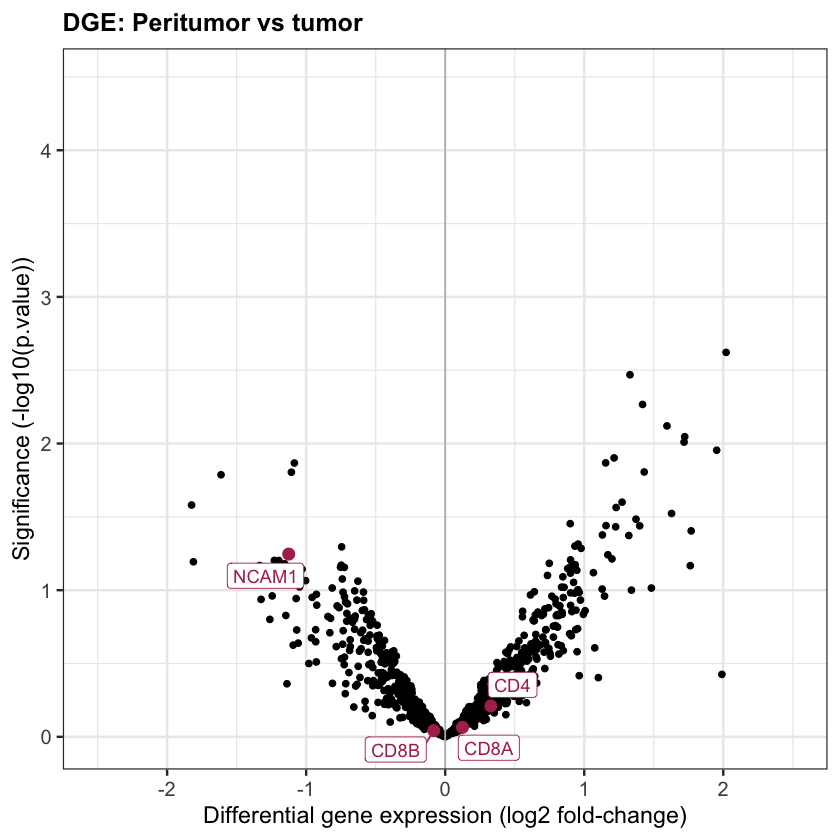

In [16]:
all_table %>%
    mutate(
        `label`=case_when(
            `gene_symbol` %in% genes_of_interest ~ `gene_symbol`,
            TRUE ~ ''
        )
    ) %>%
    ggplot(aes(x=`logFC`, y=-log10(`P.Value`))) +
        geom_point() +
        geom_vline(xintercept=0, color='gray') +
        geom_point(
            data=. %>% filter(`gene_symbol` %in% genes_of_interest),
            size=3,
            color='maroon'
        ) +
        geom_label_repel(
            data=. %>% filter(`gene_symbol` %in% genes_of_interest),
            aes(label=`label`), max.overlaps=Inf, force=10,
            color='maroon'
        ) +
        labs(
            x='Differential gene expression (log2 fold-change)',
            y='Significance (-log10(p.value))',
            title='DGE: Peritumor vs tumor'
        ) +
        xlim(-2.5, 2.5) +
        theme_bw(base_size=15) +
        theme(
            axis.text=element_text(size=12),
            axis.title=element_text(size=14),
            strip.text.x = element_text(size=15, face="bold"),
            plot.title = element_text(size=15, face="bold")
        )